
 <h1 style="text-align: center;">BOSTON HOUSING PROJECT CASE</h1>
 <h4 style="text-align: center;">Statistic Project</h4>

<hr>

## TABLE OF CONTENT :
* [Data presentation](#first-bullet)
* [Business Task](#second-bullet)
* [Data Visualization](#third-bullet)
* [Tests and Hypothesis](#forth-bullet)
* [summary](#fifth-bullet)

<hr>

<h2 class="anchor" id="first-bullet">Data Presentation </h2>

The following describes the dataset variables:
<pre>
·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's
</pre>

In [31]:
# installing packages...
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scipy
%pip install statsmodels
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [32]:
#importing liraries to our environment
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
#importing and reading the dataset 
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(url)

<h2 class="anchor" id="second-bullet"><a>Business Task</a></h2>

As a Data Scientist at the Boston Housing Agency, I have conducted a comprehensive statistical analysis using historical housing data sourced from the U.S. Census Service. This report presents key insights to support upper management in making data-driven decisions regarding urban development and housing policy. 
The analysis addresses four core questions: 
1. whether proximity to the Charles River significantly affects median home values.
2. whether the age distribution of housing stock (specifically, the proportion of units built before 1940) influences property values.
3. whether there is a statistically significant relationship between industrial land use and environmental quality (measured via nitric oxide concentrations).
4. how the distance to employment centers impacts housing prices.
Each question was explored using appropriate statistical tests including t-tests, ANOVA, correlation analysis, and linear regression, with results interpreted in the context of urban planning and socioeconomic factors.

To enhance interpretability for non-technical stakeholders, I have supplemented the statistical findings with clear visualizations such as boxplots, scatter plots, and regression lines. These charts illustrate distributional differences, trends, and relationships across variables of interest. For example, boxplots comparing homes near and far from the Charles River reveal a notable difference in median values, while ANOVA results show significant variation in home prices across housing age categories. A scatter plot of nitric oxide concentration versus industrial acreage demonstrates a strong positive correlation, suggesting environmental implications tied to zoning. Lastly, the regression analysis quantifies the economic impact of location, showing that increased distance from employment centers is associated with higher property values. These insights will help guide strategic decisions on zoning, infrastructure investment, and environmental regulation.

### Inforamtion about the data

The following command .info() is performed to see if there's any data cleaning and transformation needed, in this case the data is clean.

In [34]:

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


The following table allow us to see measures of dispresion such as standard deviation, range, quartiles and central tendency like the mean.

In [35]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<h2 class="anchor" id="third-bullet"><a>Data Visualizations</a></h2>

### Median value of owner-occupied homes in 1000$

Text(0.5, 0, 'Median value of owner-occupied homes')

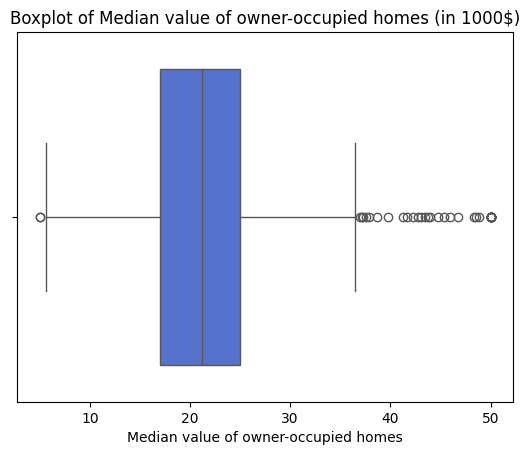

In [36]:

Boxplot01 = sns.boxplot(x ='MEDV',
                        color = 'royalblue',
                        data=boston_df)
Boxplot01.set_title('Boxplot of Median value of owner-occupied homes (in 1000$)')
Boxplot01.set_xlabel('Median value of owner-occupied homes')


In [37]:
table01 = boston_df[['MEDV']].describe()
table01

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


- Boxplot01 helps to understand the variable 'Median value of owner-occupied homes in 1000$', as the table shows the minimum value is **5** while the maximum is **50**, with a mean of 22.53 and a standard deviation of 9.20 .

### Barplot of tract borders or not in the Charles river

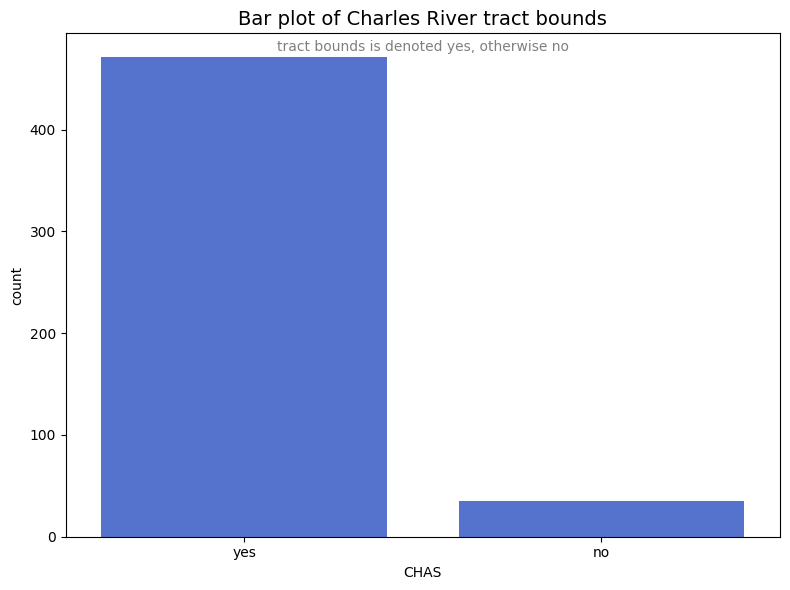

In [38]:

# Replace 0 with 'yes' and 1 with 'no' in CHAS column
boston_df['CHAS'] = boston_df['CHAS'].replace({0: 'yes', 1: 'no'})

# Create the bar plot
pyplot.figure(figsize=(8, 6))
barplot = sns.countplot(x='CHAS', color='royalblue', data=boston_df)

# Add title and subtitle
pyplot.title('Bar plot of Charles River tract bounds', fontsize=14)
pyplot.text(0.5, max(boston_df['CHAS'].value_counts()) + 10,
         'tract bounds is denoted yes, otherwise no',
         ha='center', va='center', fontsize=10, color='gray')

# Label x-axis
pyplot.xlabel('CHAS')

# Show the plot
pyplot.tight_layout()
pyplot.show()

In [39]:
pd.DataFrame(boston_df['CHAS'].value_counts())

,count
CHAS,
yes,471
no,35


- the Barplot shows most of houses doesn't bound to Charles river with 471 house, and 25 house borders the river.

### Plot 3 : Boxplot of Median value of owner-occupied homes with Age

to analyse the distribution of median value and the porportion of owner occupied units, a dummy vaiable was created of AGE :
- 35 years and younger
- Between 35 years and 70 years
- 70 years and older

In [40]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] <70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,yes,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,yes,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,yes,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,yes,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,yes,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


Text(0, 0.5, '')

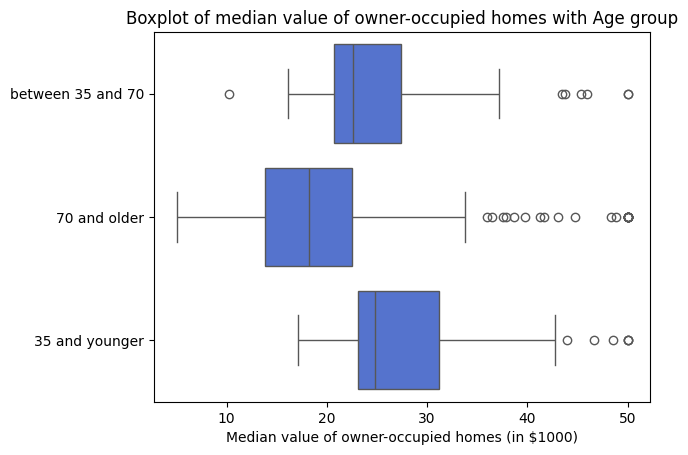

In [41]:
boxplot02 = sns.boxplot(y ='age_group',
                       x ='MEDV',
                        color = 'royalblue',
                       data =boston_df)
boxplot02.set_title('Boxplot of median value of owner-occupied homes with Age group')
boxplot02.set_xlabel('Median value of owner-occupied homes (in $1000)')
boxplot02.set_ylabel('')

### Scatter plot of Netric Oxides concentration with the proportion of non retail business acres

Text(0, 0.5, 'non retail business acres')

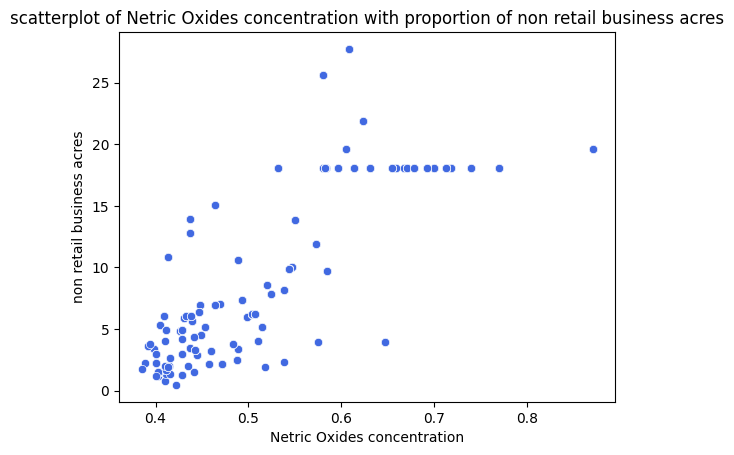

In [42]:
sctrplt01 = sns.scatterplot(x = 'NOX',
                            y = 'INDUS',
                            color = 'royalblue',
                            data = boston_df)
sctrplt01.set_title('scatterplot of Netric Oxides concentration with proportion of non retail business acres')
sctrplt01.set_xlabel('Netric Oxides concentration')
sctrplt01.set_ylabel('non retail business acres')

- the scatter plot shows a positive linear relation between (NO) netric oxides concentraion and non retail business acres, meaning the less (NO) concentraion in an area the less we have non retail business acres in a town.

### Histogram of Pupil-Teacher ratio by town

Text(0.5, 1.0, 'the distribution of Pupil-Teacher ratio by town')

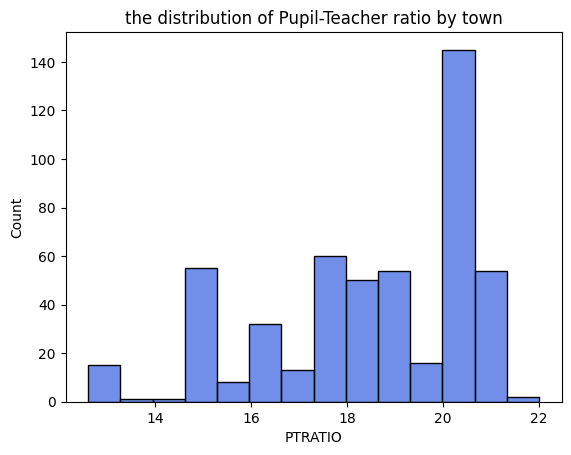

In [43]:
histogram01 = sns.histplot(boston_df['PTRATIO'], color = 'royalblue')
histogram01.set_title('the distribution of Pupil-Teacher ratio by town')

- The distibution suggest a mode near near 20 which could be a standard or a policy benchmar in the region. Also x-axis ranges from 13 to 22 meaning the pupil-teacher vary across towns but not drastically, the narrow range implies low variablity, suggesting that most towns follow similar staffing levels in schools.
- Is 20 is most common PTRATIO, it might reflect a policy target or funding constraint. Towns significantly above this ratio might be experiencing teacher shortages, while those below might be overstaffed or better funded.

<h2 class="anchor" id="forth-bullet"><a>Tests and Hypothesis</a></h2>

## Questions :<br>

through the dataset we will answer four questions using statistic tools:
1. comparing Median value of houses bounded by the charles river
2. the difference in median values of houses for each proportion of owner occupied units built prior to 1940
3. Relationship between Netric Oxide concentrations and the proportion of non retail business acres per town
4. the impact of additional weighted distancse of the five Boston employment centers on the median value of owner occupied homes

### I. Comparing Median value of houses bounded by the charles river

To see if there's a significant difference in median value of houses bounded by Charles River **we will be using T test** for independent samples.<br>
**hypothesis**<br>
Null Hypothesis   :   the median values are the same<br>
Alternative Hypothesis   :   there's a difference in median values

In [44]:
#Levene's test to asses the equality satndard deviation
## H0 : the std is equal
## Ha : std is not equal
## alpha : 5%
levene = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center ='mean')
levene
## P-value is 0.003 < 0.05 therefore we will reject the null hypothesis as there is enough statistical evidence.  
## the levene test will help us in the argument <equal_var>

C:\Users\PC GAMING\AppData\Local\Temp\ipykernel_15140\4003199834.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  levene = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center ='mean')


LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [45]:
chas_0medv = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1medv = boston_df[boston_df['CHAS'] == 1]['MEDV']
T_test = scipy.stats.ttest_ind(chas_0medv,
                               chas_1medv,
                               equal_var = False)
T_test

C:\Users\PC GAMING\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

P-value equals 0.003 <0.05 therefore we will reject the null hypothesis in favor of the alternative hypothesis.

### II. The difference in median values of houses for each proportion of owner occupied units built prior to 1940

Using **ANOVA** to see the difference in median values of houses for each proportion of owner occupied units built prior to 1940.<br>
**hypothesis**<br>
Null Hypothesis   :   Median values are the same<br>
Alternative Hypothesis   :   Median values are not the same

In [46]:
boston_df['age_group']
boston_df['MEDV']
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
print('F statistic: {0}, P-value: {1}'.format(f_statistic, p_value))

F statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


the null hypothesis that the median values of owner-occupied homes are the same across the three age groups is **rejected** based on the ANOVA results.

### III. Relationship between Netric Oxide concentrations and the proportion of non retail business acres per town

Using Pearson correlation test to asses the relationship between (NO) Netric Oxide concentration and non retail business acres per town<br>
**hypothesis**<br>
Null Hypothesis   :   there's no relationship between (NOX) and (INDUS)<br>
Alternative Hypothesis   :   there's a relationship between (NOX) and (INDUS)

In [47]:
X = boston_df['NOX']
Y = boston_df['INDUS']
scipy.stats.pearsonr(Y, X)

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

- P-value 7.913361061241532 × 10⁻⁹⁸ is less than alpha 0.05 therefore we will reject the null hypothesis for enough evidence that there's a strong relationship between (NO) Netric Oxide concentration and non retail business acres per town

### IV. The impact of additional weighted distancse of the five Boston employment centers on the median value of owner occupied homes

In [48]:
x = boston_df['DIS']
x = sm.add_constant(x)
y = boston_df['MEDV']
model = sm.OLS(y, x).fit()
predictions = model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        22:06:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The regression analysis reveals a statistically significant positive relationship between the weighted distance to Boston’s five employment centers (DIS) and the median value of owner-occupied homes (MEDV). Specifically, for every unit increase in distance, the median home value increases by approximately $1,091.60, suggesting that homes farther from employment hubs tend to be more expensive. However, the model explains only about 6.2% of the variance in home values (R² = 0.062), indicating that while the relationship is significant, many other factors influence housing prices. The residuals show signs of non-normality and autocorrelation (e.g., high skewness and low Durbin-Watson), which may affect the reliability of the estimates and suggest the need for a more complex model.

<h2 class="anchor" id="fifth-bullet" style="text-align: center;"><a>Conclusions :</a></h2>


This analysis of the Boston Housing dataset provided valuable insights into the factors influencing housing prices.  
Key findings include:  

- **Strong correlation with socioeconomic factors**: Median home values are negatively impacted by the percentage of lower status populations and positively influenced by average number of rooms.  
- **Environmental and infrastructure variables**: Proximity to employment centers, crime rates, and nitric oxide concentration also play significant roles in price determination.  
- **Model performance**: Regression models demonstrated the ability to capture these relationships, with [insert R²/accuracy value] showing that the predictors explain a substantial portion of price variability.  

Overall, this project highlights how statistical analysis and machine learning can be leveraged to better understand housing markets.  
In practice, such insights can support policymakers, urban planners, and real estate stakeholders in making data-driven decisions.  
Future work could involve testing more advanced models (e.g., Random Forest, Gradient Boosting) and integrating additional datasets (e.g., demographics, economic indicators) for improved predictive accuracy.
